In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import time 
import json
import numpy as np
from scipy.stats import linregress

#import api key 
from api_keys import weather_api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output data file 
output_data_file = "output_data/cities.csv"

#range of lat and long 
lat_rng = (-90, 90)
lng_rng = (-180, 180)

In [2]:
#list for holding lat/lng and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(lat_rng[0], lat_rng[1], size = 1500)
lngs = np.random.uniform(lng_rng[0], lng_rng[1], size = 1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat, lng combo
for lat_lng in lat_lngs: 
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if city is unique, then add to our cities list
    if city not in cities: 
        cities.append(city)
    
#print the city count to confirm sufficient count
len(cities)

640

In [5]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"

#make empty lists to store values 
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#begin printing query responses
print("Beginning Data Retrieval")
print("-----------------------------")

#iterate through data 
i = 1
for city in cities:
    weather_response = requests.get(query_url + city).json()
    
    try: 
        print(f"Processing Record {i} | {city}.")
        
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_name.append(weather_response["name"])
        
        i += 1
        
    except: 
        print("City not found. Moving on to the next")
    
        
print("-----------------------------")
print("Data retrieval complete.")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | bluff.
Processing Record 2 | bredasdorp.
Processing Record 3 | dongsheng.
Processing Record 4 | rikitea.
Processing Record 5 | bathsheba.
Processing Record 6 | metehara.
City not found. Moving on to the next
Processing Record 6 | pisco.
Processing Record 7 | fairbanks.
Processing Record 8 | lagoa.
Processing Record 9 | gombe.
Processing Record 10 | clyde river.
Processing Record 11 | norman wells.
Processing Record 12 | avarua.
Processing Record 13 | dingle.
Processing Record 14 | chipinge.
Processing Record 15 | vaitupu.
City not found. Moving on to the next
Processing Record 15 | lompoc.
Processing Record 16 | hilo.
Processing Record 17 | aklavik.
Processing Record 18 | busselton.
Processing Record 19 | greenwood.
Processing Record 20 | dikson.
Processing Record 21 | barentsburg.
City not found. Moving on to the next
Processing Record 21 | iquique.
Processing Record 22 | cabo san lucas.
Processing Record 23 

Processing Record 200 | kpandu.
Processing Record 201 | namibe.
Processing Record 202 | iqaluit.
Processing Record 203 | mehamn.
Processing Record 204 | manaure.
Processing Record 205 | esperance.
Processing Record 206 | kodiak.
Processing Record 207 | sumbe.
Processing Record 208 | nizhneyansk.
City not found. Moving on to the next
Processing Record 208 | cremona.
Processing Record 209 | tiznit.
Processing Record 210 | namatanai.
Processing Record 211 | santa cruz cabralia.
Processing Record 212 | padang.
Processing Record 213 | quatre cocos.
Processing Record 214 | los llanos de aridane.
Processing Record 215 | iskateley.
Processing Record 216 | luderitz.
Processing Record 217 | isangel.
Processing Record 218 | faanui.
Processing Record 219 | cockburn town.
Processing Record 220 | erzin.
Processing Record 221 | victoria.
Processing Record 222 | batsfjord.
Processing Record 223 | pinheiro.
Processing Record 224 | paso de carrasco.
Processing Record 225 | biograd na moru.
Processing Re

Processing Record 408 | cedar city.
Processing Record 409 | jumla.
Processing Record 410 | ndiekro.
City not found. Moving on to the next
Processing Record 410 | andenes.
Processing Record 411 | marsh harbour.
Processing Record 412 | ustka.
Processing Record 413 | quito.
Processing Record 414 | ambon.
Processing Record 415 | malinyi.
Processing Record 416 | lisburn.
Processing Record 417 | wa.
City not found. Moving on to the next
Processing Record 417 | kalispell.
Processing Record 418 | seydisehir.
Processing Record 419 | ancud.
Processing Record 420 | mezen.
Processing Record 421 | makakilo city.
Processing Record 422 | artyk.
City not found. Moving on to the next
Processing Record 422 | brae.
Processing Record 423 | saint-georges.
Processing Record 424 | yulara.
Processing Record 425 | the pas.
Processing Record 426 | kasongo-lunda.
Processing Record 427 | mao.
Processing Record 428 | kargopol.
Processing Record 429 | vila.
Processing Record 430 | rantepao.
Processing Record 431 | 

In [6]:
#creating dataframe 
city_df = pd.DataFrame({"City": city_name, 
                       "Cloudiness": cloudiness, 
                       "Country": country, 
                       "Date": date, 
                       "Humidity": humidity, 
                       "Latitude": lat, 
                       "Longitude": lng, 
                       "Max Temp": max_temp, 
                       "Wind Speed": wind_speed})

city_df = city_df.rename_axis('City ID')

city_df.to_csv("city.csv")

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Bluff,100,NZ,1637586683,69,-46.6000,168.3333,50.70,7.34
1,Bredasdorp,100,ZA,1637586683,80,-34.5322,20.0403,63.93,11.56
2,Dongsheng,6,CN,1637586684,20,39.8161,109.9776,20.71,7.58
3,Rikitea,89,PF,1637586508,72,-23.1203,-134.9692,74.17,8.01
4,Bathsheba,40,BB,1637586684,62,13.2167,-59.5167,86.61,16.11


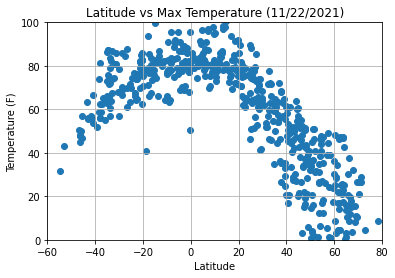

In [10]:
# x_val = city_df['Laitude']
# y_val = city_df['Max Temp']

#scatter plot
plt.scatter(city_df['Latitude'], city_df['Max Temp'])
plt.title("Latitude vs Max Temperature (11/22/2021)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(0,100)
plt.xlim(-60, 80)
plt.grid(True)

#save plot as picture 
plt.savefig('maxtemp_lat.png')
plt.show()

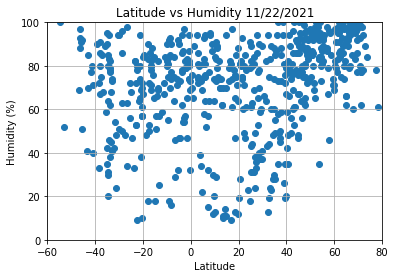

In [11]:
plt.scatter(city_df['Latitude'], city_df['Humidity'])
plt.title("Latitude vs Humidity 11/22/2021")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.ylim(0,100)
plt.xlim(-60,80)
plt.grid(True)

#save as picture 
plt.savefig("latitude_vs_humidity.png")
plt.show()

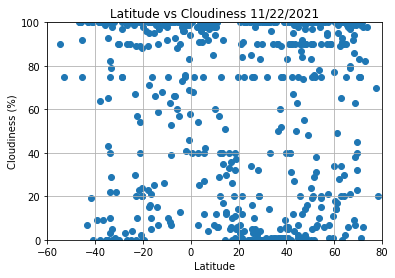

In [13]:
plt.scatter(city_df['Latitude'], city_df['Cloudiness'])
plt.title("Latitude vs Cloudiness 11/22/2021")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.ylim(0,100)
plt.xlim(-60,80)
plt.grid(True)

#save as picture 
plt.savefig("latitude_vs_cloudiness.png")
plt.show()

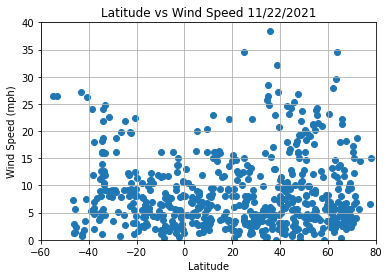

In [14]:
plt.scatter(city_df['Latitude'], city_df['Wind Speed'])
plt.title("Latitude vs Wind Speed 11/22/2021")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,40)
plt.xlim(-60,80)
plt.grid(True)

#save as picture 
plt.savefig("latitude_vs_windspeed.png")
plt.show()

In [27]:
#set up linear regression 
def linear_reg_plot(x_values, y_values): 
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    #make linear equation 
    line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #create scatter plot and print rvalue
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.median(), y_values.median()) ,fontsize=15,color='red')
    
    print(f"The r-value is: {rvalue}")

In [28]:
#create northern/southern hemisphere df
northern = city_df.loc[city_df["Latitude"] >=0]
southern = city_df.loc[city_df["Latitude"] < 0]

The r-value is: -0.8757864270904462
None


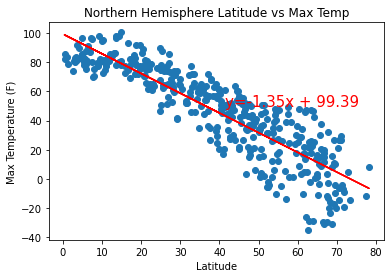

In [30]:
#setting values for plot and axis labels 
x_values = northern["Latitude"]
y_values = northern["Max Temp"]
plt.ylabel("Max Temperature (F)")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere Latitude vs Max Temp")
print(linear_reg_plot(x_values, y_values))

The r-value is: 0.6137034470534607
None


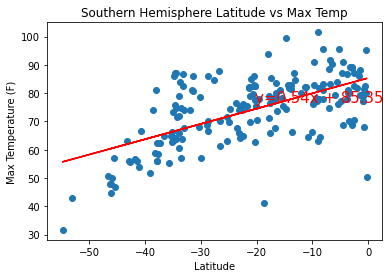

In [31]:
#setting values for plot and axis labels 
x_values = southern["Latitude"]
y_values = southern["Max Temp"]
plt.ylabel("Max Temperature (F)")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere Latitude vs Max Temp")
print(linear_reg_plot(x_values, y_values))

The r-value is: 0.4273153065968492
None


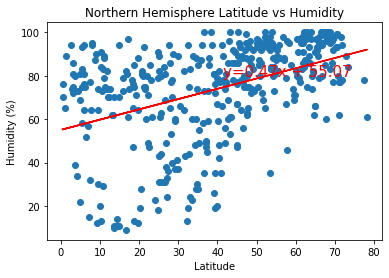

In [32]:
#setting values for plot and axis labels 
x_values = northern["Latitude"]
y_values = northern["Humidity"]
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere Latitude vs Humidity")
print(linear_reg_plot(x_values, y_values))

The r-value is: 0.01307233600232704
None


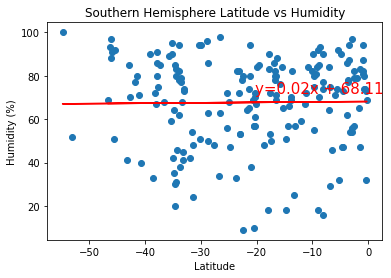

In [33]:
#setting values for plot and axis labels 
x_values = southern["Latitude"]
y_values = southern["Humidity"]
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere Latitude vs Humidity")
print(linear_reg_plot(x_values, y_values))

The r-value is: 0.13958388816450076
None


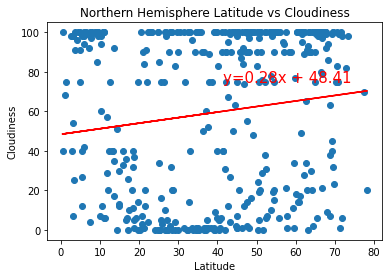

In [34]:
#setting values for plot and axis labels 
x_values = northern["Latitude"]
y_values = northern["Cloudiness"]
plt.ylabel("Cloudiness")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere Latitude vs Cloudiness")
print(linear_reg_plot(x_values, y_values))

The r-value is: 0.1538416765496506
None


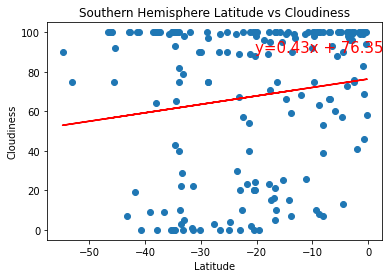

In [35]:
#setting values for plot and axis labels 
x_values = southern["Latitude"]
y_values = southern["Cloudiness"]
plt.ylabel("Cloudiness")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere Latitude vs Cloudiness")
print(linear_reg_plot(x_values, y_values))

The r-value is: 0.07061773692999648
None


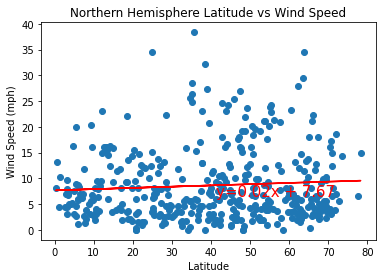

In [36]:
#setting values for plot and axis labels 
x_values = northern["Latitude"]
y_values = northern["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere Latitude vs Wind Speed")
print(linear_reg_plot(x_values, y_values))

The r-value is: -0.30331023766263726
None


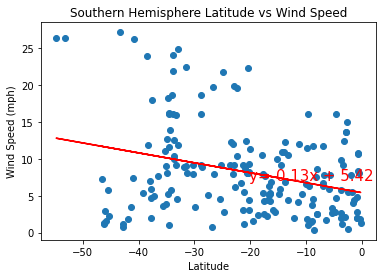

In [37]:
#setting values for plot and axis labels 
x_values = southern["Latitude"]
y_values = southern["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere Latitude vs Wind Speed")
print(linear_reg_plot(x_values, y_values))